In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
compas = pd.read_csv("compas-scores.csv")
compas.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,NaN,13009779CF10A,F,NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,1,NaN,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,NaN,13011511MM10A,M,0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
4,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13


In [4]:
#removing columns I thought are unnecessary
colremove = [ 'name', 'first', 'last', 'compas_screening_date','dob','age_cat',
             'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas','r_case_number',
     'r_days_from_arrest', 'r_offense_date',
      'r_jail_in', 'r_jail_out','vr_case_number', 
       'vr_offense_date', 'screening_date',
      'v_screening_date',]

In [5]:
compas2 = compas.drop(colremove, axis =1)
compas2

,id,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_charge_degree,r_charge_desc,is_violent_recid,num_vr_cases,vr_charge_degree,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,type_of_assessment,decile_score.1,score_text
0,1,Male,69,Other,0,1,0,0,0,F,Aggravated Assault w/Firearm,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,1,Low,Risk of Recidivism,1,Low
1,2,Male,31,Caucasian,0,5,0,0,0,O,NaN,-1,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,2,Low,Risk of Recidivism,5,Medium
2,3,Male,34,African-American,0,3,0,0,0,F,Felony Battery w/Prior Convict,1,NaN,F,Felony Battery (Dom Strang),1,NaN,(F3),Felony Battery (Dom Strang),Risk of Violence,1,Low,Risk of Recidivism,3,Low
3,4,Male,24,African-American,0,4,0,1,4,F,Possession of Cocaine,1,NaN,M,Driving Under The Influence,0,NaN,NaN,NaN,Risk of Violence,3,Low,Risk of Recidivism,4,Low
4,5,Male,23,African-American,0,8,1,0,1,F,Possession of Cannabis,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,6,Medium,Risk of Recidivism,8,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11752,11753,Male,47,Other,0,3,0,0,1,F,Burglary Structure Unoccup,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,1,Low,Risk of Recidivism,3,Low
11753,11754,Male,22,Caucasian,0,7,3,5,3,M,Battery,1,NaN,M,Driving License Suspended,0,NaN,NaN,NaN,Risk of Violence,5,Medium,Risk of Recidivism,7,Medium
11754,11755,Male,35,Other,0,4,0,0,0,M,Battery,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,3,Low,Risk of Recidivism,4,Low
11755,11756,Male,29,Caucasian,0,3,0,0,2,M,arrest case no charge,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,2,Low,Risk of Recidivism,3,Low


In [6]:
#Filtering for charges that are only possesion
DrugPossession = compas2[compas2['c_charge_desc'].isin(['Possession of Cocaine',
'Possession Of Cocaine',
'Purchase Of Cocaine', 
 'Possess Cannabis/20 Grams Or Less',
 'Possession of Cannabis',
 'Purchase Cannabis',
 'Possess Cannabis 1000FTSch',
'Pos Cannabis For Consideration',
'Poss3,4 Methylenedioxymethcath',
 'Possession Of Alprazolam',
 'Poss Pyrrolidinovalerophenone',
 'Possession Of Heroin',
'Possession Of Methamphetamine',
 'Possession of Oxycodone',
'Poss Contr Subst W/o Prescript',
 'Possession of Hydromorphone',
 'Possession of Hydrocodone',
 'Poss Of Controlled Substance',
 'Possession of Ethylone',
 'Poss 3,4 MDMA (Ecstasy)',
 'Possess Drug Paraphernalia',
'Possession Of Amphetamine',
 'Possession of Morphine',
'Poss Tetrahydrocannabinols',
'Poss Meth/Diox/Meth/Amp (MDMA)',
'Possession of Methadone',
'Possession Of Buprenorphine',
 'Possession of Codeine',
 'Possession of LSD',
'Poss of Methylethcathinone',
 'Possession of Benzylpiperazine',
 'Possession Of Lorazepam',
 'Possession Of 3,4Methylenediox',
 'Possession Of Oxymorphone',
 'Possession Of Fentanyl',
'Possession of XLR11',
 'Possession Of Diazepam',
'Possession Of Clonazepam', 
'Poss Drugs W/O A Prescription',
'Possession Of Carisoprodol',
 'Poss Of RX Without RX',
 'Poss 5-Methoxy-N-methyl-N-isop',
 'Poss Pyrrolidinobutiophenone',
 'Possession of Butylone',
'Possess Tobacco Product Under 18',
 'Possession Of Anabolic Steroid',
'Possession Of Phentermine',
'Possession of Alcohol Under 21',
'Possession Of Alcohol Under 21',
 'Possess Controlled Substance',
'Poss Trifluoromethylphenylpipe',
'Poss Of 1,4-Butanediol',
 'Pos Gamma-Hydroxybutyric Acid',
 'Poss 3,4 Methylendioxpyrovlerone',
]) ]

DrugPossession = DrugPossession.rename(columns ={"sex":"Sex"})
DrugPossession = DrugPossession.rename(columns ={"race":"Race"})
x = DrugPossession.c_charge_desc.value_counts(True)
#Showing breakdown of what the drug charges come from
x

Possession of Cocaine                0.465255
Possess Cannabis/20 Grams Or Less    0.084050
Possession of Cannabis               0.072138
Poss3,4 Methylenedioxymethcath       0.053607
Possession Of Alprazolam             0.052283
Poss Pyrrolidinovalerophenone        0.046327
Possession Of Heroin                 0.032429
Possession Of Methamphetamine        0.029120
Possession of Oxycodone              0.027796
Poss Contr Subst W/o Prescript       0.019193
Possession of Hydromorphone          0.013898
Possession of Hydrocodone            0.011251
Poss Of Controlled Substance         0.009265
Possession of Ethylone               0.008604
Poss 3,4 MDMA (Ecstasy)              0.007942
Possess Drug Paraphernalia           0.007280
Possession Of Amphetamine            0.006618
Purchase Cannabis                    0.005295
Possession of Morphine               0.005295
Poss Tetrahydrocannabinols           0.003309
Possession of Methadone              0.002647
Poss Meth/Diox/Meth/Amp (MDMA)    

In [7]:
#Creating dataframe: Grouped firstby score_text, in racial and sex category so I could sum the number of entries.
#Then I reset the dataframe and only include id for count, and the important columns
DrugPossession2 = DrugPossession.groupby(["Race","Sex","score_text"]).count().reset_index()[["id","Race","score_text","Sex"]]
DrugPossession2                                   

,id,Race,score_text,Sex
0,34,African-American,High,Female
1,36,African-American,Low,Female
2,32,African-American,Medium,Female
3,245,African-American,High,Male
4,183,African-American,Low,Male
5,183,African-American,Medium,Male
6,1,Asian,Low,Female
7,2,Asian,Medium,Male
8,28,Caucasian,High,Female
9,82,Caucasian,Low,Female


In [8]:
#Filter only for White and Black due to sample sizes
DrugPossession3 = DrugPossession2[(DrugPossession2.Race == "African-American")| (DrugPossession2.Race == "Caucasian")]
DrugPossession3

,id,Race,score_text,Sex
0,34,African-American,High,Female
1,36,African-American,Low,Female
2,32,African-American,Medium,Female
3,245,African-American,High,Male
4,183,African-American,Low,Male
5,183,African-American,Medium,Male
8,28,Caucasian,High,Female
9,82,Caucasian,Low,Female
10,53,Caucasian,Medium,Female
11,68,Caucasian,High,Male


In [9]:
#Getting dummy variables of only race and sex from previous dataset
Compdum = pd.get_dummies(DrugPossession, prefix=["Race","Sex"], columns=["Race","Sex"])
Compdum

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_charge_degree,r_charge_desc,is_violent_recid,num_vr_cases,vr_charge_degree,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,type_of_assessment,decile_score.1,score_text,Race_African-American,Race_Asian,Race_Caucasian,Race_Hispanic,Race_Native American,Race_Other,Sex_Female,Sex_Male
3,4,24,0,4,0,1,4,F,Possession of Cocaine,1,NaN,M,Driving Under The Influence,0,NaN,NaN,NaN,Risk of Violence,3,Low,Risk of Recidivism,4,Low,1,0,0,0,0,0,0,1
4,5,23,0,8,1,0,1,F,Possession of Cannabis,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,6,Medium,Risk of Recidivism,8,High,1,0,0,0,0,0,0,1
10,11,20,0,10,0,1,0,F,Possession Of Alprazolam,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,9,High,Risk of Recidivism,10,High,0,0,1,0,0,0,0,1
11,12,26,0,5,0,0,0,F,Possession Of Alprazolam,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,3,Low,Risk of Recidivism,5,Medium,0,0,1,0,0,0,1,0
13,14,27,0,4,0,0,0,F,"Poss 3,4 MDMA (Ecstasy)",0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,4,Low,Risk of Recidivism,4,Low,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11709,11710,32,0,4,0,0,2,F,Possession Of Methamphetamine,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,2,Low,Risk of Recidivism,4,Low,0,0,1,0,0,0,0,1
11724,11725,25,0,7,0,0,3,F,Possession of Cocaine,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,4,Low,Risk of Recidivism,7,Medium,1,0,0,0,0,0,0,1
11728,11729,55,0,1,0,0,6,F,Possession of Morphine,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,1,Low,Risk of Recidivism,1,Low,0,0,1,0,0,0,0,1
11731,11732,22,0,6,0,0,2,M,Possess Drug Paraphernalia,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,6,Medium,Risk of Recidivism,6,Medium,1,0,0,0,0,0,0,1


In [10]:
Com2 = Compdum
Com2 = Com2.rename(columns ={"Race_African-American": "Race_African_American"})
Com2.columns

Index(['id', 'age', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc', 'is_recid', 'num_r_cases', 'r_charge_degree', 'r_charge_desc', 'is_violent_recid', 'num_vr_cases', 'vr_charge_degree', 'vr_charge_desc', 'v_type_of_assessment', 'v_decile_score', 'v_score_text', 'type_of_assessment', 'decile_score.1', 'score_text', 'Race_African_American', 'Race_Asian', 'Race_Caucasian', 'Race_Hispanic', 'Race_Native American', 'Race_Other', 'Sex_Female', 'Sex_Male'], dtype='object')

In [11]:
#Summing total in gender and race category
Com2 = [Com2[Com2.Sex_Female == 1].Race_African_American.sum(),
           Com2[Com2.Sex_Male == 1].Race_African_American.sum(),
           Com2[Com2.Sex_Female == 1].Race_Caucasian.sum(),
           Com2[Com2.Sex_Male == 1].Race_Caucasian.sum(),
          ]
Com2

[102, 612, 163, 465]

In [12]:
#Adding data column
Com3 = np.repeat(Com2, 3)
Com3

array([102, 102, 102, 612, 612, 612, 163, 163, 163, 465, 465, 465])

In [13]:
rt = list(Com3)

In [14]:
DrugPossession3['totals'] = rt
DrugPossession3 = DrugPossession3.rename(columns = {"score_text":"Decile Score Category"})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
#Presenting it as # collum
DrugPossession3["% of Gender/Race Category"] = round(DrugPossession3["id"]/DrugPossession3["totals"]*100, 1)
COMPAS2 = DrugPossession3
COMPAS2 = COMPAS2.rename(columns = {"Race": "Race"})
COMPAS2

,id,Race,Decile Score Category,Sex,totals,% of Gender/Race Category
0,34,African-American,High,Female,102,33.3
1,36,African-American,Low,Female,102,35.3
2,32,African-American,Medium,Female,102,31.4
3,245,African-American,High,Male,612,40.0
4,183,African-American,Low,Male,612,29.9
5,183,African-American,Medium,Male,612,29.9
8,28,Caucasian,High,Female,163,17.2
9,82,Caucasian,Low,Female,163,50.3
10,53,Caucasian,Medium,Female,163,32.5
11,68,Caucasian,High,Male,465,14.6


In [16]:
COMPASPIVOT = COMPAS2.pivot_table(
    values = "% of Gender/Race Category",
    index =  'Decile Score Category',
    columns = 'Race'
    
)

In [17]:
#creating subplots
r1 = COMPAS2[(COMPAS2.Race == "African-American")]
r3 = COMPAS2[(COMPAS2.Race == "Caucasian")]

In [18]:
m1 = COMPAS2[(COMPAS2.Sex == "Male")]
m2 = COMPAS2[(COMPAS2.Sex == "Female")]

In [19]:
#visualizing data to put on powerpoint
MALECOMPASPIVOT = m1.pivot_table(
    values = "% of Gender/Race Category",
    index =  'Decile Score Category',
    columns = 'Race')
MALECOMPASPIVOT.reindex(["Low","Medium","High"])

Race,African-American,Caucasian
Decile Score Category,,
Low,29.9,57.8
Medium,29.9,27.1
High,40.0,14.6


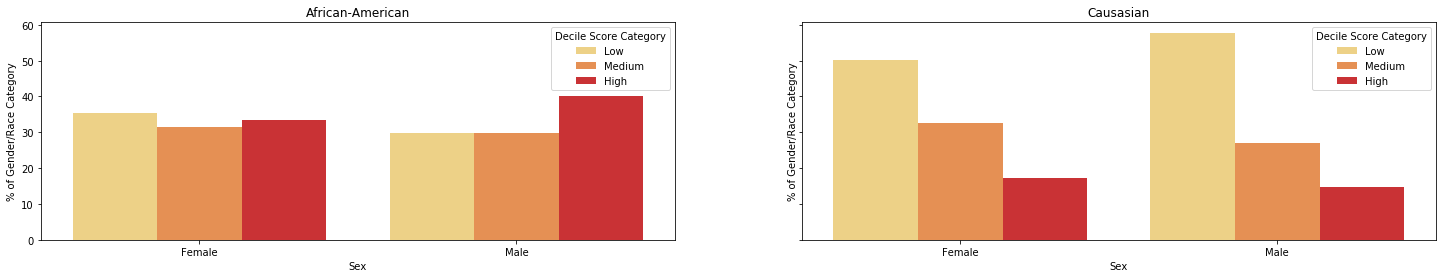

In [20]:
#creating plots by gender and by sex
f, axes = plt.subplots(1, 2, sharey=True, figsize=(25, 4))
rac1 = (sns.barplot(x= "Sex" , y="% of Gender/Race Category", data=r1, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd", ax=axes[0])).set_title("African-American")
rac3 = (sns.barplot(x= "Sex" , y="% of Gender/Race Category", data=r3, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd", ax=axes[1])).set_title("Causasian")

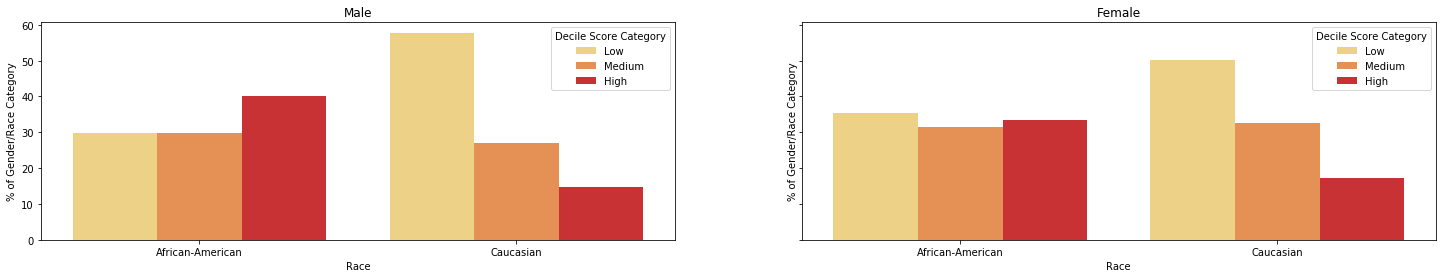

In [21]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(25, 4))
Sex1 = (sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m1, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd", ax=axes[0])).set_title("Male")
Sex2 = (sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m2, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd", ax=axes[1])).set_title("Female")

Text(0.5, 1.0, 'Distribution of Decile Score for Drug Possession Offenses: Male Convicts')

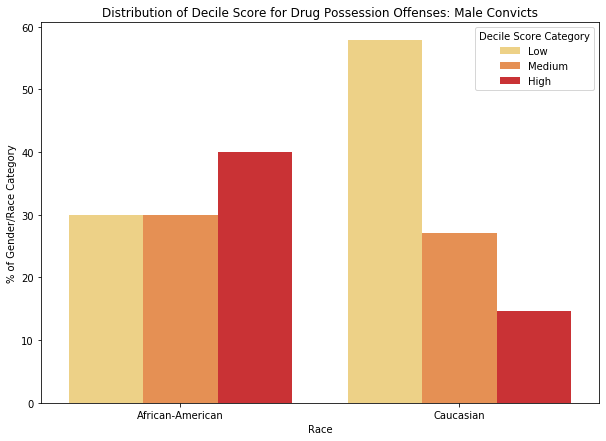

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m1, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd").set_title("Distribution of Decile Score for Drug Possession Offenses: Male Convicts")

In [23]:
#Creating comparison, determining total number of African Americans predicted to recid with Drug offense vs actual total recids in Drug Offense
compasblackpredict = DrugPossession[(DrugPossession.Race == "African-American")&(DrugPossession.Sex == "Male")]

compasblackpredict = compasblackpredict[["is_recid", "decile_score"]]

compasblackpredict = compasblackpredict[(compasblackpredict.is_recid != -1)& (compasblackpredict.decile_score != -1)]
compasblackpredict



,is_recid,decile_score
3,1,4
4,0,8
17,0,4
77,0,6
79,1,4
...,...,...
11653,0,9
11655,0,10
11702,0,1
11724,0,7


In [24]:
#Defining a prediction as a decile score greater than 5
Bllikely = (compasblackpredict[compasblackpredict.decile_score > 5]).decile_score.count()
Bllikely

377

In [25]:
# summing total recid
recid = compasblackpredict.is_recid.sum()
recid

308

In [26]:
# Overestimated by 22%
Bllikely/recid

1.224025974025974

In [27]:
# Doing same thing as above but for White drug offenders
compaswhitepredict = DrugPossession[(DrugPossession.Race == "Caucasian") &(DrugPossession.Sex == "Male")]

compaswhitepredict = compaswhitepredict[["is_recid","decile_score"]]

compaswhitepredict = compaswhitepredict[(compaswhitepredict.is_recid != -1)]
compaswhitepredict.head()

,is_recid,decile_score
10,0,10
13,0,4
23,1,3
26,1,2
54,0,2


In [28]:
Whlikely = (compaswhitepredict[compaswhitepredict.decile_score > 5]).decile_score.count()
Whlikely

138

In [29]:
Whrecid = compaswhitepredict.is_recid.sum()
Whrecid

155

In [30]:
Whlikely/Whrecid

0.8903225806451613

In [32]:
#Creaing dataframe to easily graph
Baggresults = pd.DataFrame({"Race": ["Black Men", "White Men", "Black Men", "White Men", "Black Men", "White Men"],
                   'Data': [recid, Whrecid, Bllikely, round(Whlikely,0), round(((recid/Bllikely)-1)*100,2),round(((Whrecid/Whlikely)-1)*100,2)],
                   "Metric": ["# of Recidivisms","# of Recidivisms","# With Score > 5","# With Score > 5", "% Error", "% Error"] })
Baggresults =Baggresults.groupby(["Race", "Metric"]).mean()
Baggresults = Baggresults.reset_index()
Baggresults

,Race,Metric,Data
0,Black Men,# With Score > 5,377.00
1,Black Men,# of Recidivisms,308.00
2,Black Men,% Error,-18.30
3,White Men,# With Score > 5,138.00
4,White Men,# of Recidivisms,155.00
5,White Men,% Error,12.32


In [33]:
list([Baggresults.Data.iloc[2], Baggresults.Data.iloc[5]])

[-18.3, 12.32]